# Welcome to our Talk on Machine Learning (ML) using scikit-learn

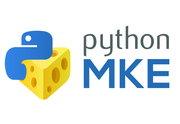

In [14]:
from IPython.display import Image
Image('./mke_python.jpeg') 

# Question: why learn ML?

# We will be doing our talk using the Jupyter notebook. Some of the code will vary because of magic functions etc.

In [15]:
'Note: we are using Python version 3.5. If you are 2.7, then the code could be different'
!python -V

Python 3.5.2 :: Anaconda custom (x86_64)


# There is great documentation on the http://scikit-learn.org/ website

http://scikit-learn.org/stable/documentation.html#

# There is a really cool decision tree if you don't know where to start on scikit-learn's website that has links to estimators (models)

http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

# Also, if you are looking for a great place to play with test data, go to Kaggle
https://www.kaggle.com/